# ***Task 2.1 - Fisher Iris Dataset***

## **Importing the libraries**

In [12]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec,cm
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset using "np.load" in .npy format
a = np.load('Iris_data (2).npy')
b = np.load('Iris_labels.npy')

# For ease of usage, converting .npy to .csv
df1 = pd.DataFrame(a)
df1.to_csv("data1.csv")
print(df1)
df2 = pd.DataFrame(b)
df2.to_csv("data2.csv")
print(df2)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]


The following Data consists of 150 samples.

Features consists of the following :
* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

Labels are the following:
* Setosa - 0
* Versicolor - 1
* Virginica - 2

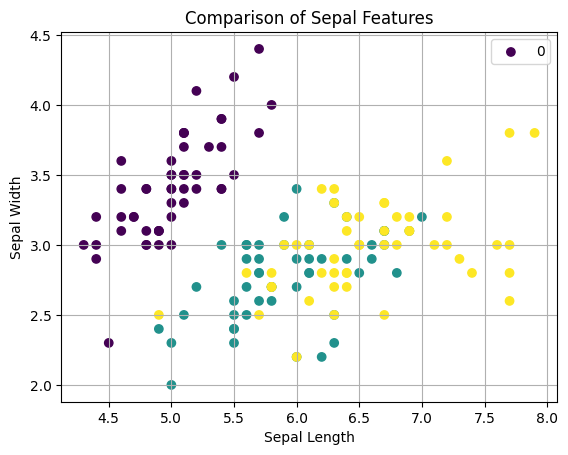

In [13]:
# Plotting the first 2 vectors of the Iris Datasets
X = df1.iloc[:,0].values
Y = df1.iloc[:,1].values

plt.scatter(X,Y, c = df2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Comparison of Sepal Features')
plt.legend(df2[:])
plt.grid()
plt.show()

# **Training the Kmeans**

In [14]:
km1 = KMeans(n_clusters = 3, init = 'k-means++')
y_predicted = km1.fit_predict(df1)
y_predicted.shape

(150,)

# **Plotting the centroids with labels**

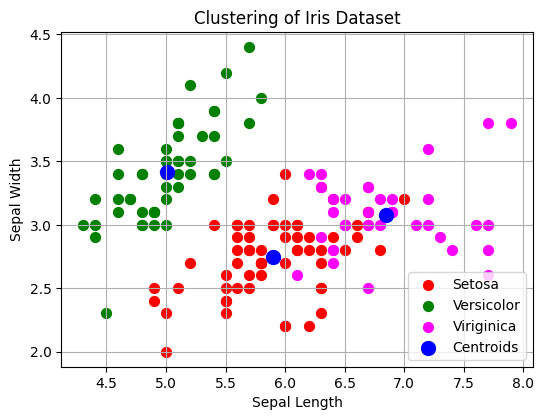

In [15]:
plt.ion()
fig1 = plt.figure(figsize = (14,10))
gs1  = gridspec.GridSpec(2,2, hspace = 0.3, wspace = 0.3)

ax1 = plt.subplot(gs1[0,0])
plt.scatter(df1.iloc[y_predicted == 0, 0], df1.iloc[y_predicted == 0, 1],  s= 50, c = 'red', label = 'Setosa')
plt.scatter(df1.iloc[y_predicted == 1, 0], df1.iloc[y_predicted == 1, 1],  s= 50, c = 'green', label = 'Versicolor')
plt.scatter(df1.iloc[y_predicted == 2, 0], df1.iloc[y_predicted == 2, 1], s= 50, c = 'magenta', label = 'Viriginica')

plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()

# **Task 2.3 Gaussian Mixture Modelling**

In [16]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components=3, random_state = 42).fit(df1)
gm_prd1 = gm1.predict(df1)
gm_prd1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Plotting the Centroids of each Component with Labels**

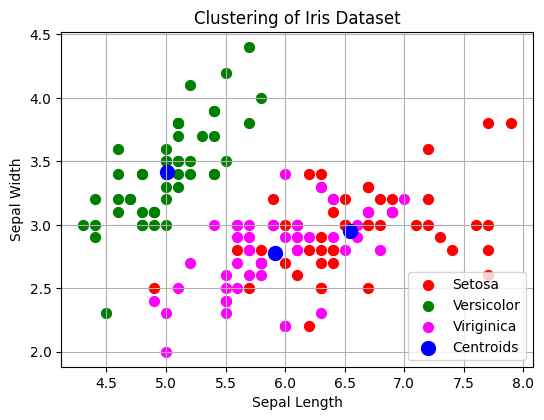

In [17]:
plt.ion()
fig2 = plt.figure(figsize = (14,10))
gs2  = gridspec.GridSpec(2,2, hspace = 0.3, wspace = 0.3)

ax2 = plt.subplot(gs2[0])
plt.scatter(df1.iloc[gm_prd1 == 0, 0], df1.iloc[gm_prd1 == 0, 1],  s= 50, c = 'red', label = 'Setosa')
plt.scatter(df1.iloc[gm_prd1 == 1, 0], df1.iloc[gm_prd1 == 1, 1],  s= 50, c = 'green', label = 'Versicolor')
plt.scatter(df1.iloc[gm_prd1 == 2, 0], df1.iloc[gm_prd1 == 2, 1], s= 50, c = 'magenta', label = 'Viriginica')
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Predicting the Probabilities of every Data Point

prob_prd1 = gm1.predict_proba(df1)
print(prob_prd1.shape)

# Range of this probabilities
print(np.ptp(prob_prd1))

(150, 3)
1.0


## Plotting with respect to each component and using color intensification to classify

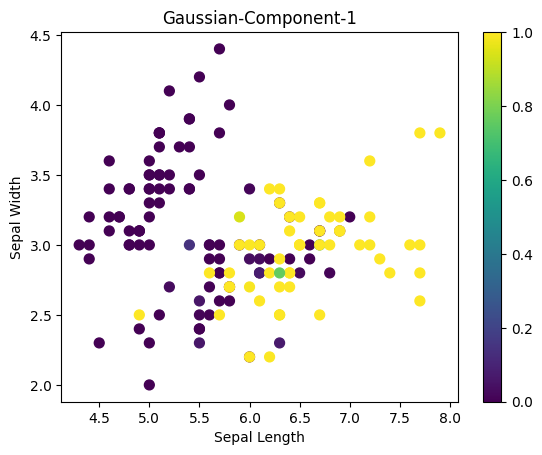

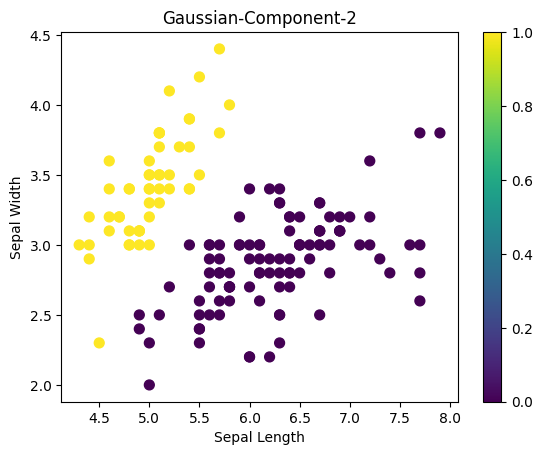

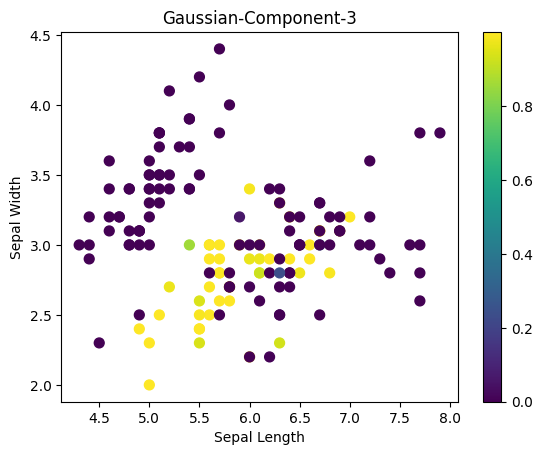

In [19]:
for i in range(3):
  plt.scatter(df1.iloc[:,0], df1.iloc[:,1], c = prob_prd1[:,i], s = 50)
  plt.colorbar()
  plt.title(f'Gaussian-Component-{i+1}')
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.show()

# **Task 2.4**

In [20]:
#Importing the Task Data

# Loading the dataset using "np.load" in .npy format
a1 = np.load('task2_4.npy')


# For ease of usage, converting .npy to .csv
df3 = pd.DataFrame(a1)
df3.to_csv("data3.csv")
df3.shape

(100, 10)

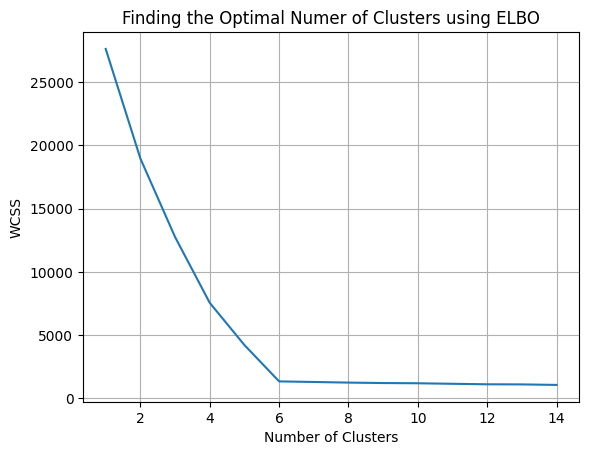

In [21]:
# Initialising the weighted sum squared distances as a list

wcss = []

for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(df3)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,15), wcss)
plt.title('Finding the Optimal Numer of Clusters using ELBO')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()

# **Task 2.5**

In [22]:
# Identifying the parts where the update method is implemented in the code

'''Q1)  The main implemetation of the above formula is done in EM Algorithm

   Q2) Due to random initialisation trap which is due to randomly intialisation of Centroids produces different type of clusters when run.
   To avoid this procedure, a new different algorithm called as 'k-means++' is utilised as an intilisation parameter to avoid this trap.

   Kmeans ++:
   * Firts chooses a single Centroid and then calculated the distance between all pointrs and centroid. Then we have to square this distance
   * Then we must check for the highest distance which is now having the highest probability to get selected as the new centroid

   Hence we can use
   from sklearn.clusters import KMeans
   kmeans = KMeans(n_clusters = k, init = 'k-means++')
'''



"Q1)  The main implemetation of the above formula is done in EM Algorithm \n\n   Q2) Due to random initialisation trap which is due to randomly intialisation of Centroids produces different type of clusters when run.\n   To avoid this procedure, a new different algorithm called as 'k-means++' is utilised as an intilisation parameter to avoid this trap.\n\n   Kmeans ++:\n   * Firts chooses a single Centroid and then calculated the distance between all pointrs and centroid. Then we have to square this distance\n   * Then we must check for the highest distance which is now having the highest probability to get selected as the new centroid\n\n   Hence we can use \n   from sklearn.clusters import KMeans\n   kmeans = KMeans(n_clusters = k, init = 'k-means++')\n"